In [257]:
from tables import deftype_from_kind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_netflix = pd.read_csv("netflix_titles.csv")

In [258]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The data has been loaded in the DataFrame

In [259]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We can see the information of Features present in the DataFrame

In [260]:
# Splitted cast with ","

df_netflix['cast'] = df_netflix['cast'].apply(lambda x: x.split(', ') if pd.notna(x) else [])


Dealing with clustered comma values which are clubbed in each row , as there many actors working for 1 film , so they to be seperated in order to form next row

In [261]:
# splitted listed_in with ","

df_netflix["listed_in"] = df_netflix["listed_in"].apply(lambda x : x.split(', ') if pd.notna(x) else [])

Dealing with clustered comma values which are clubbed in each row , as there many genres for movies and tvshows  , so they to be seperated in order to form next row in order to filtered type of film basis the genre

In [262]:
df_netflix["country"]=df_netflix["country"].apply(lambda x:x.split(', ') if pd.notna(x) else[])


This is the interesting part dealing with the clustered comma value for countries for which netflix has release particular movies are sometime clubbed ,which makes it difficult to find the count of distribution of movies and tvshows among countries hence we are trying to separate them out .

In [263]:
df_netflix["director"]=df_netflix["director"].apply(lambda x:x.split(', ') if pd.notna(x) else[])

As per the data set there multiple directors for few films for example :Stranger things directed by duffer brothers so they are in count of 2 , but one of them can make different movies , hence if they are clubbed it will be difficult to find how many numbers of movie or tvshows they have directed , hence can hamper the analysis , lets try to seperate them .

In [264]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[],[],[],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


To see the first five rows of DataFrame

In [265]:
df_cast_split = df_netflix.explode(column = 'cast', ignore_index=True)
df_netflix_refined = df_cast_split.explode(column = 'listed_in', ignore_index=True)



df_netflix_refined[['duration_value', 'duration_unit']] = df_netflix_refined['duration'].str.split(' ', 1, expand=True)
df_netflix_refined = df_netflix_refined.drop('duration', axis=1)



<ipython-input-265-5799fbe4f205>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_netflix_refined[['duration_value', 'duration_unit']] = df_netflix_refined['duration'].str.split(' ', 1, expand=True)


Basically as previously mentioned above , here the explode() functions is basically unnesting the column that have clustred values in each rows. So once the explode is done all the values will appearing in seperate row and hence more information will be acheieved inorder to work on the analysis

In [266]:


df_netflix_refined = df_netflix_refined.explode(column='country', ignore_index=True)

df_netflix_refined = df_netflix_refined.explode(column='director', ignore_index=True)


Basically as previously mentioned above , here the explode() functions is basically unnesting the column that have clustred values in each rows. So once the explode is done all the values will appearing in seperate row and hence more information will be acheieved inorder to work on the analysis, Here we are doing for country and director

In [338]:
Shapes = df_netflix_refined.shape
Null_counts=df_netflix_refined.isna().sum()
print(Shapes)
print(Null_counts)

(201991, 19)
show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added         158
release_year         0
rating               0
listed_in            0
description          0
duration_value       0
duration_unit        0
release_month      158
days_to_netflix    158
added_week         158
added_month        158
year_added         158
month_added        158
dtype: int64


As you can see the Null have not occured for columns except the columns that require date information . We cannot remove nulls for those rows or will we loose data .and if they are renamed to different string , it will be difficult to parse them back to datetime .hence it remains the same rest every null has been modified .

In [267]:
df_netflix_refined.ndim

2

Specifies the dimension of DataFrame

In [268]:
df_netflix_refined.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'duration_value',
       'duration_unit'],
      dtype='object')

In [269]:
df_netflix_movies = df_netflix_refined[df_netflix_refined["type"]=="Movie"]
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min


Displaying the first 5 rows with type movie

In [270]:
df_netflix_refined["country"].value_counts()

United States     59349
India             22814
United Kingdom    12945
Japan              8679
France             8254
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 127, dtype: int64

Gives count of each country value that has occured in the row

In [271]:
df_netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [272]:
df_netflix_tvshows = df_netflix_refined[df_netflix_refined["type"]=="TV Show"]
df_netflix_tvshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons


Gives the first five rows with type TV Show

In [273]:

print(df_netflix_refined.shape[0])
print(df_netflix_movies.shape[0])
print(df_netflix_tvshows.shape[0])

201991
145843
56148


After unnesting the columns , we have more data , hence the number of rows is 2L plus.

In [274]:
df_netflix_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   show_id         201991 non-null  object
 1   type            201991 non-null  object
 2   title           201991 non-null  object
 3   director        151348 non-null  object
 4   cast            199845 non-null  object
 5   country         190094 non-null  object
 6   date_added      201833 non-null  object
 7   release_year    201991 non-null  int64 
 8   rating          201924 non-null  object
 9   listed_in       201991 non-null  object
 10  description     201991 non-null  object
 11  duration_value  201988 non-null  object
 12  duration_unit   201988 non-null  object
dtypes: int64(1), object(12)
memory usage: 20.0+ MB


Descibed info of our extracted dataframe

In [275]:
df_netflix_refined.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


The statistical Information for numertical values has been described above , which can be use to find precise insights

In [276]:
# finding Nulls

print("Columns with missing values")

column_with_nulls = df_netflix_refined.isnull().any()
print(column_with_nulls)

Columns with missing values
show_id           False
type              False
title             False
director           True
cast               True
country            True
date_added         True
release_year      False
rating             True
listed_in         False
description       False
duration_value     True
duration_unit      True
dtype: bool


After dealing with unnesting , the NaN values were present in the dataframe , so inorder to remove them , we tried to rename it with good string values below.

In [277]:
# finding total nulls present in those columns that have null values

total_nulls = df_netflix_refined.T.apply(lambda x : x.isnull().sum(),axis =1 )
total_nulls

show_id               0
type                  0
title                 0
director          50643
cast               2146
country           11897
date_added          158
release_year          0
rating               67
listed_in             0
description           0
duration_value        3
duration_unit         3
dtype: int64

Above we have calculated the total null values

In [278]:
# creating a function to replace NaN null values with "Precise information"
def replace_NaN_director(df_netflix_refined):
  if pd.isna(df_netflix_refined["director"]):
    return "No Information Available"
  else:
    return df_netflix_refined["director"]

Replacing NaN with "No information Available" as  director information is not present

In [279]:
df_netflix_refined["director"]=df_netflix_refined.apply(replace_NaN_director, axis = 1)


Hence applying the above function to replicate the change in the column ["director"]

In [280]:
def replace_NaN_country_date_added(df_netflix_refined):
  if pd.isna(df_netflix_refined['country']):
    return "No Information Available"
  else:
    return df_netflix_refined["country"]

def replace_NaN_date_added(df_netflix_refined):
  if pd.isna(df_netflix_refined["date_added"]):
   return "No date available"
  else :
    return df_netflix_refined["date_added"]


Replacing NaN with "No information Available" as  country and date_added information is not present

In [281]:
df_netflix_refined['country']= df_netflix_refined.apply(replace_NaN_country_date_added,axis=1)
df_netflix_refined.head()
df_netflix_refined["date_added"] =df_netflix_refined.apply(replace_NaN_date_added,axis =1 )

In [282]:
df_netflix_refined.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,s2,TV Show,Blood & Water,No Information Available,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons


displying first 5 rows to check the whether NaN has been replaced

In [283]:
# lets try to fill the average rating value for rating columns that contain null values


def replace_NaN_rating(df_netflix_refined):
  if pd.isna(df_netflix_refined["rating"]):
    return "No Rating available"
  else:
    return df_netflix_refined["rating"]


In [284]:
df_netflix_refined["rating"] = df_netflix_refined.apply(replace_NaN_rating,axis=1)
df_netflix_refined.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,s2,TV Show,Blood & Water,No Information Available,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons


In [285]:
df_netflix_refined[["duration_value","duration_unit"]].isna().sum()

duration_value    3
duration_unit     3
dtype: int64

In [286]:
df_netflix_refined["duration_value"].fillna(0,inplace=True)
df_netflix_refined["duration_unit"].fillna(0,inplace=True)

df_netflix_refined[["duration_value","duration_unit"]].isna().sum()

duration_value    0
duration_unit     0
dtype: int64

Here we were dealing with numerical values so we replaced NaN with 0 number

In [287]:
df_netflix_refined.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons


In [288]:
# replace NaN values with "unknown actor" for cast column

def replace_NaN_Cast(df_netflix_refined):
  if pd.isna(df_netflix_refined["cast"]):
    return "Unknown Actor"
  else:
    return df_netflix_refined["cast"]

Changing NaN with "Unknown Actor"

In [289]:
df_netflix_refined["cast"]=df_netflix_refined.apply(replace_NaN_Cast,axis=1)

In [290]:
df_netflix_refined.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,s2,TV Show,Blood & Water,No Information Available,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons


In [291]:
df_netflix_refined.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'duration_value',
       'duration_unit'],
      dtype='object')

In [292]:
# 1. Find the counts of each categorical variable both using graphical and non-graphical
# Type

type_counts = df_netflix_refined["type"].value_counts()
print(type_counts)

Movie      145843
TV Show     56148
Name: type, dtype: int64


This count displays the total of movies and tvshows distributed in netflix

In [293]:
# listed_in

listed_in_counts = df_netflix_refined["listed_in"].value_counts()
print(listed_in_counts)

Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

above is the Non graphical analysis where we found that which Genre is booming the market for netflix and we can clearly see that Dramas is on Top

In [294]:
# country

country_counts = df_netflix_refined["country"].value_counts()
print(country_counts)

United States               59349
India                       22814
United Kingdom              12945
No Information Available    11897
Japan                        8679
                            ...  
Palestine                       2
Kazakhstan                      1
Nicaragua                       1
United States,                  1
Uganda                          1
Name: country, Length: 128, dtype: int64


Non Graphical Analysis , inorder to find which country has the most distribution of netflix contents the info is clear as United States is on top

In [295]:
# rating
rating_counts = df_netflix_refined["rating"].value_counts()

print(rating_counts)

TV-MA                  73867
TV-14                  43931
R                      25860
PG-13                  16246
TV-PG                  14926
PG                     10919
TV-Y7                   6304
TV-Y                    3665
TV-G                    2779
NR                      1573
G                       1530
NC-17                    149
TV-Y7-FV                  86
UR                        86
No Rating available       67
74 min                     1
84 min                     1
66 min                     1
Name: rating, dtype: int64


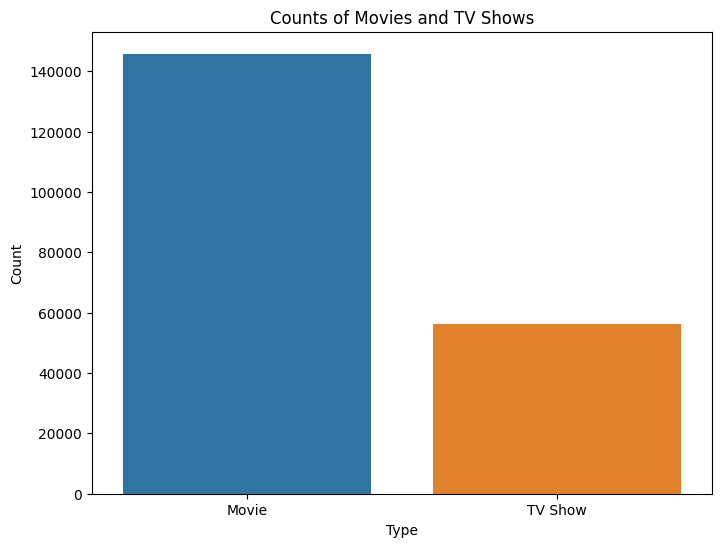

In [296]:
# Lets do the Graphical Analysis
# finding the counts of tv shows in each category (USING COUNT PLOT)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(data=df_netflix_refined,x="type")
plt.title("Counts of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Above count plot analysis states the count of movies and tv shows provided by netflix over the world

<ipython-input-349-98eb48644291>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



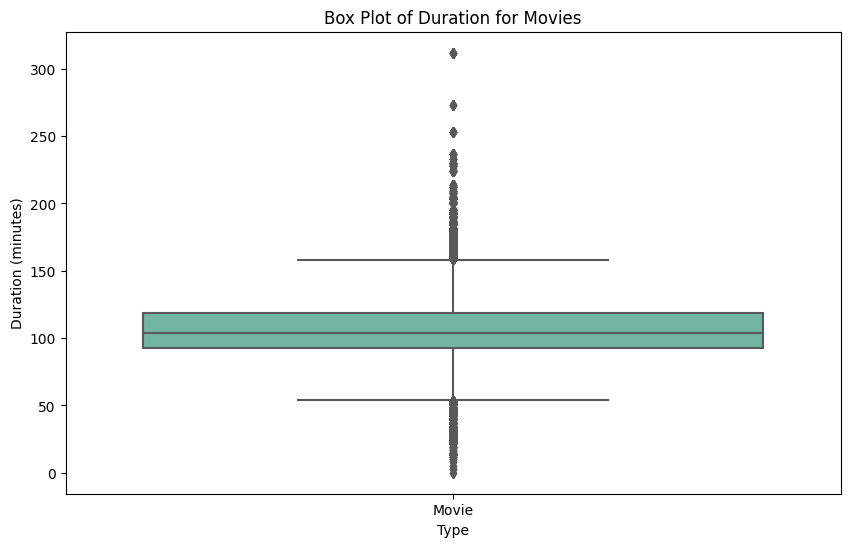

In [349]:
# Also lets try to find out the distribution of duration between movies


import seaborn as sns
import matplotlib.pyplot as plt

df_movies = df_netflix_refined[df_netflix_refined['type'] == 'Movie']

df_movies['duration_value'] = pd.to_numeric(df_movies['duration_value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='type', y='duration_value', palette='Set2')
plt.title('Box Plot of Duration for Movies')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()


As per the analysis above this plot clearly states that Movies distribution across netflix as duration around 1 hour 30 mins that the duration where most movies are directed and uploaded on netflix. as we can also there many outliers which even lie before 50 minutes which can be considered as short films and there are films which are over 1.5 hours and 2.5 hours which are indeed outliers rare values which should be removed as it can hamper the data .

<ipython-input-351-befbf3dd87b5>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



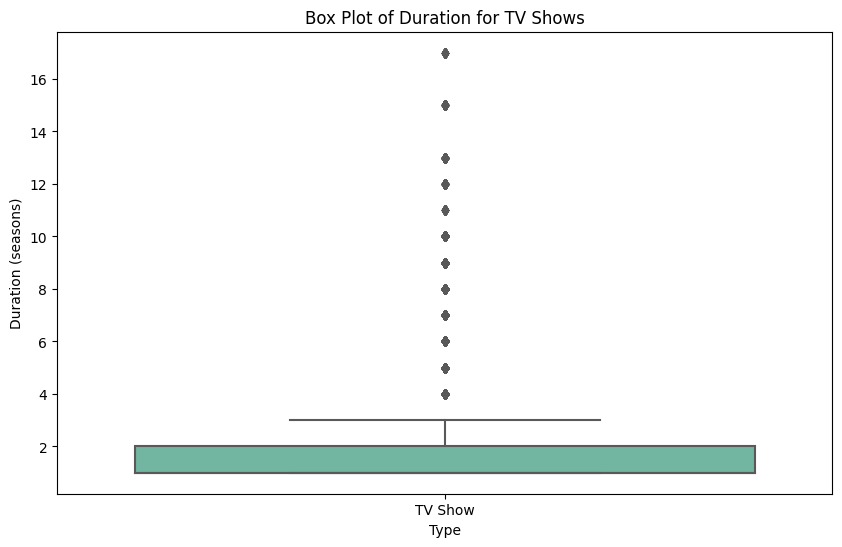

In [351]:
 #Also lets try to find out the distribution of duration between Tv shows
import seaborn as sns
import matplotlib.pyplot as plt

df_tv_shows = df_netflix_refined[df_netflix_refined['type'] == 'TV Show']

df_tv_shows['duration_value'] = pd.to_numeric(df_tv_shows['duration_value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tv_shows, x='type', y='duration_value', palette='Set2')
plt.title('Box Plot of Duration for TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration (seasons)')
plt.show()


As the above Analysis clearly states that distribution of TV Shows on netflix ,lasts mainly for 2 seasons, there are very few shows which exceed the average count of seasons , hence rare values can be treated as outliers and we should always remove in order to find precise insights

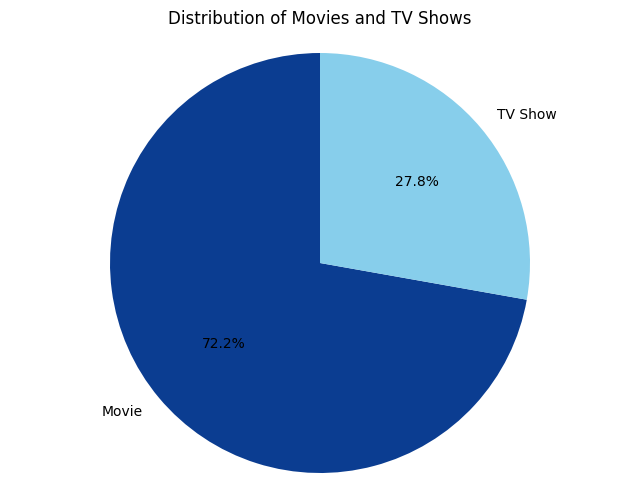

In [297]:
# Lets do the Graphical Analysis
# finding the counts of tv shows in each category (USING PIE CHART)

import matplotlib.pyplot as plt


count_by_type = df_netflix_refined['type'].value_counts()


colors = ['#0B3D91', '#87CEEB']

plt.figure(figsize=(8, 6))
plt.pie(count_by_type, labels=count_by_type.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Movies and TV Shows')
plt.axis('equal')
plt.show()

To check the percentage distribution of Movies and TV shows across netflix we have represent a pie chart presentation

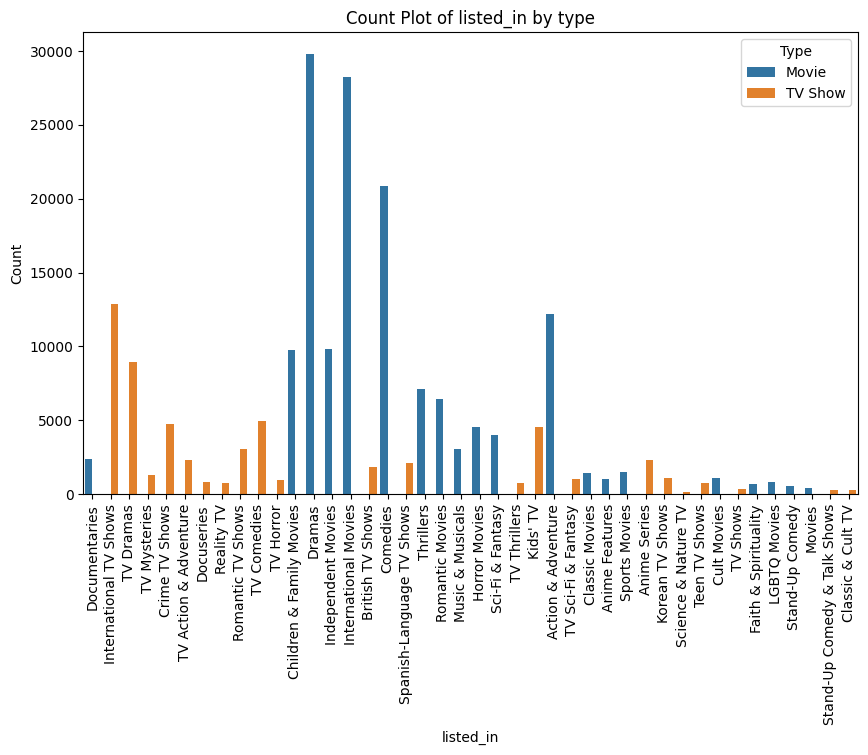

In [298]:
# Lets do the Graphical Analysis
# finding the counts of tv shows in each category

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df_netflix_refined, x='listed_in', hue='type')
plt.title('Count Plot of listed_in by type')
plt.xlabel('listed_in')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type', loc='upper right')
plt.show()


We have also tried to create a graphical analysis of most genres distributed on netflix as per the type .we can see that most movies netflix has is Dramas based genre and for Tv shows we can see its international tv series.

In [299]:
df_netflix_refined.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,s2,TV Show,Blood & Water,No Information Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,s2,TV Show,Blood & Water,No Information Available,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons


In [300]:
# Find the number of movies produced in each country and pick the top 10 countries.


In [301]:
def count_movies(df_netflix_refined):
 group_movies = df_netflix_refined[df_netflix_refined["type"]=="Movie"]
 movies_count_by_country =group_movies.groupby("country")["type"].count().sort_values(ascending=False)
 return movies_count_by_country


Creating a function to find the most most movies produced in each country and we need top ten to identify .

In [302]:
count_movies_with_country = df_netflix_refined.groupby("country").apply(count_movies)
count_movies_with_country.sort_values(ascending=False).head(10)


country                   country                 
United States             United States               45816
India                     India                       21411
United Kingdom            United Kingdom               8560
France                    France                       6607
No Information Available  No Information Available     6199
Canada                    Canada                       5738
Japan                     Japan                        3525
Spain                     Spain                        3469
Germany                   Germany                      3427
China                     China                        2377
Name: type, dtype: int64

displays top ten movies produced in each country

In [303]:
movies_df = df_netflix_refined[df_netflix_refined['type'] == 'Movie']

movies_count_country = movies_df.groupby("country")["type"].count().sort_values(ascending=False)


In [304]:
movies_count_country.head(10)

country
United States               45816
India                       21411
United Kingdom               8560
France                       6607
No Information Available     6199
Canada                       5738
Japan                        3525
Spain                        3469
Germany                      3427
China                        2377
Name: type, dtype: int64

In [305]:
# number of tv shows by each country and top ten countries with Tv shows

def count_tv_shows(df_netflix_refined):
  group_tv_shows =df_netflix_refined[df_netflix_refined["type"]=="TV Show"]
  tvshows_count_by_country = group_tv_shows.groupby("country")["type"].count().sort_values(ascending=False)
  return tvshows_count_by_country

In [306]:
count_tvshows_with_country = df_netflix_refined.groupby("country").apply(count_tv_shows)
count_tvshows_with_country.sort_values(ascending=False).head(10)

country                   country                 
United States             United States               13533
No Information Available  No Information Available     5698
Japan                     Japan                        5154
United Kingdom            United Kingdom               4385
South Korea               South Korea                  3754
Canada                    Canada                       2177
Mexico                    Mexico                       2018
Spain                     Spain                        1846
Taiwan                    Taiwan                       1719
France                    France                       1647
Name: type, dtype: int64

displaying the top ten countries to produce the most number of tv shows

In [334]:
# Lets try to visualize which country has produced most tvshows and movies

import plotly.express as px

# Filter out 'Country Unavailable'
filtered_countries = df_netflix_refined['country'].str.split(', ', expand=True).stack()
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

# Create a DataFrame to hold the counts
country_counts = filtered_countries.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Create a Choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode='country names',
    color="Count",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Count of TV Shows and Movies by Country",
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the map
fig.show()

Here we have also done a world map pictorial presentation to see the distribution of most tvshows and movies across the world wherever netflix has its distribution clearly we can see that USA tops the production distribution .

In [307]:
# Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

df_netflix_refined['date_added'] = pd.to_datetime(df_netflix_refined['date_added'], errors='coerce')

tv_shows_df=df_netflix_refined[df_netflix_refined["type"]=="TV Show"]
movies_df = df_netflix_refined[df_netflix_refined["type"]=="Movie"]

tv_shows_weeks_count = tv_shows_df["date_added"].dt.isocalendar().week.value_counts().sort_index()

movies_weeks_count = movies_df["date_added"].dt.isocalendar().week.value_counts().sort_index()

best_week_tv_shows = tv_shows_weeks_count.idxmax()
best_week_movies = movies_weeks_count.idxmax()

In [308]:
print("Best week to release TV Shows:", best_week_tv_shows)
print("Best week to release Movies:", best_week_movies)

Best week to release TV Shows: 27
Best week to release Movies: 1


Above is the analysis to find the best Week for netflix to release its tv shows as per the analysis we have found that week 27 is the week number in the year where netflix has most distribution and week 1 to distribute movies across all globe. Hence week 27 is best week for releasing a netflix tv show and week 1 is best week for releasing netflix movie

In [309]:
df_netflix_refined['date_added'] = pd.to_datetime(df_netflix_refined['date_added'])


df_netflix_refined['release_month'] = df_netflix_refined['date_added'].dt.month


df_movies = df_netflix_refined[df_netflix_refined['type'] == 'Movie']
df_tv_shows = df_netflix_refined[df_netflix_refined['type'] == 'TV Show']


movie_counts_by_month = df_movies['release_month'].value_counts().sort_index()
tv_show_counts_by_month = df_tv_shows['release_month'].value_counts().sort_index()


best_month_for_movies = int(movie_counts_by_month.idxmax())


best_month_for_tv_shows = int(tv_show_counts_by_month.idxmax())

print("Best Month for Movie Releases:", best_month_for_movies)
print("Best Month for TV Show Releases:", best_month_for_tv_shows)

Best Month for Movie Releases: 7
Best Month for TV Show Releases: 12


The above analysis shows the best month where netflix has released its movie which month number 7 .similarly as per the analysis we have also found that best month for releasing netflix tv show is month 12 .

In [310]:
# Analysis of actors/directors of different types of shows/movies.

# lets do for actors who have appeared in most movies and tv shows

actors_df = df_netflix_refined.groupby("cast")["title"].nunique()

actors_count_sorted = actors_df.sort_values(ascending=False)

# as we can see the top on the list is unknow actors , apart from that lets try to filter out "Unknown Actor"

top_ten_actors_exclude_unknown = actors_count_sorted[actors_count_sorted.index != "Unknown Actor"]
top_ten_actors=top_ten_actors_exclude_unknown.head(10)
print(top_ten_actors)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Paresh Rawal        28
Name: title, dtype: int64


Above is the analysis where we have found the top ten actors who has worked in maximum movies and tv shows

In [311]:
# Analysis of actors/directors of different types of shows/movies.

# lets do for directors who have appeared in most movies and tv shows

directors_df = df_netflix_refined.groupby("director")["title"].nunique()

directors_count_sorted=directors_df.sort_values(ascending=False)

top_ten_directors_exclude_no_info = directors_count_sorted[directors_count_sorted.index!= "No Information Available"]

top_ten_directors = top_ten_directors_exclude_no_info.head(10)

print(top_ten_directors)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: title, dtype: int64


Displaying the top ten directors to directo most number of movies / tv shows

In [312]:
# Which genre movies are more popular or produced more

genre_counts = df_netflix_refined["listed_in"].value_counts()

print(genre_counts)


Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

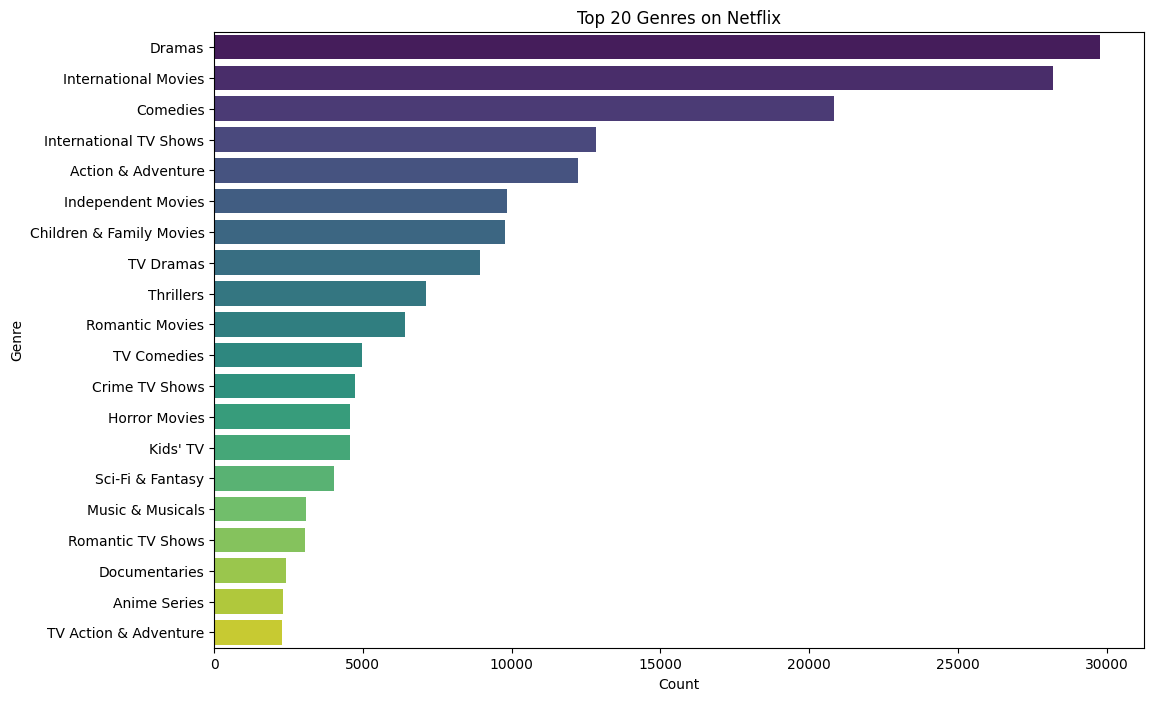

In [336]:
# Graphical Analysis for top genres to look for in netflix

import seaborn as sns
import matplotlib.pyplot as plt


top_genres = genre_counts.head(20)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


plt.title("Top 20 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.xticks(rotation=0)


plt.show()

Also a bar plot analysis for top  emerging genres on netflix

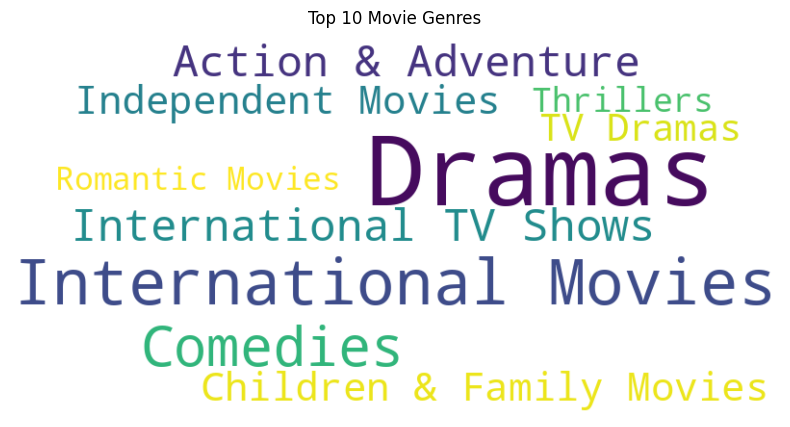

In [313]:


from wordcloud import WordCloud as wd

top_n = 10
top_genre_counts = genre_counts.head(top_n)


wordcloud = wd(width=800, height=400, background_color='white').generate_from_frequencies(top_genre_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Top {top_n} Movie Genres')
plt.axis('off')
plt.show()

we have used word cloud ,to provide insights, in which genre directors have produced more movies as we can see most directors have produced Dramas followed international movies

In [314]:
# Find After how many days the movie will be added to Netflix after the release of movie


df_netflix_refined['date_added'] = pd.to_datetime(df_netflix_refined['date_added'])


df_netflix_refined['days_to_netflix'] = (df_netflix_refined['date_added'] - pd.to_datetime(df_netflix_refined['release_year'], format='%Y')).dt.days


mode_days_to_netflix = df_netflix_refined['days_to_netflix'].mode().values[0]
print(f"Mode days to Netflix: {mode_days_to_netflix} days")


Mode days to Netflix: 547.0 days


The above stat is to display which movie has been released explicitly and after how many days it will be added to netflix , so the calculation came to be around 547 days after which most movies or tv shows has been added to netflix.

In [320]:
# Which year most number of movies were produced

tv_shows = df_netflix_refined[df_netflix_refined['type'] == 'TV Show']
movies = df_netflix_refined[df_netflix_refined['type'] == 'Movie']


tv_show_counts_by_year = tv_shows['release_year'].value_counts().sort_index()
movie_counts_by_year = movies['release_year'].value_counts().sort_index()

best_year_tv_shows = tv_show_counts_by_year.idxmax()
most_tv_shows = tv_show_counts_by_year.max()


best_year_movies = movie_counts_by_year.idxmax()
most_movies = movie_counts_by_year.max()

print("Year with the Most TV Shows Produced:", best_year_tv_shows)
print("Number of TV Shows Produced in that Year:", most_tv_shows)

print("\nYear with the Most Movies Produced:", best_year_movies)
print("Number of Movies Produced in that Year:", most_movies)

Year with the Most TV Shows Produced: 2020
Number of TV Shows Produced in that Year: 10089

Year with the Most Movies Produced: 2018
Number of Movies Produced in that Year: 17033


displaying the count of most number of movies and tv shows produced that year

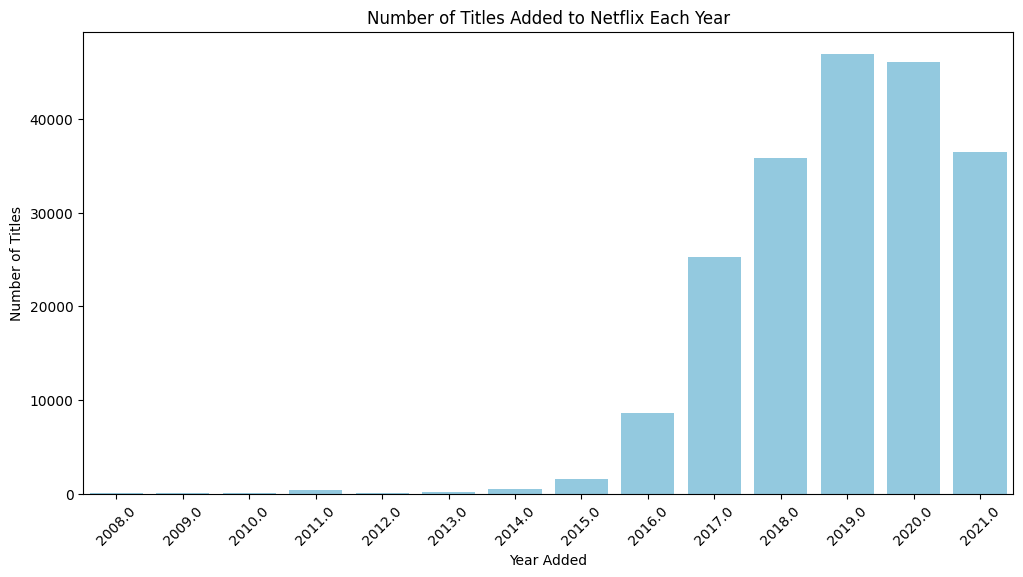

In [325]:
# Graph for above

df_netflix_refined['date_added'] = pd.to_datetime(df_netflix_refined['date_added'])


df_netflix_refined['year_added'] = df_netflix_refined['date_added'].dt.year


titles_added_by_year = df_netflix_refined['year_added'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=titles_added_by_year.index, y=titles_added_by_year.values, color='skyblue')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

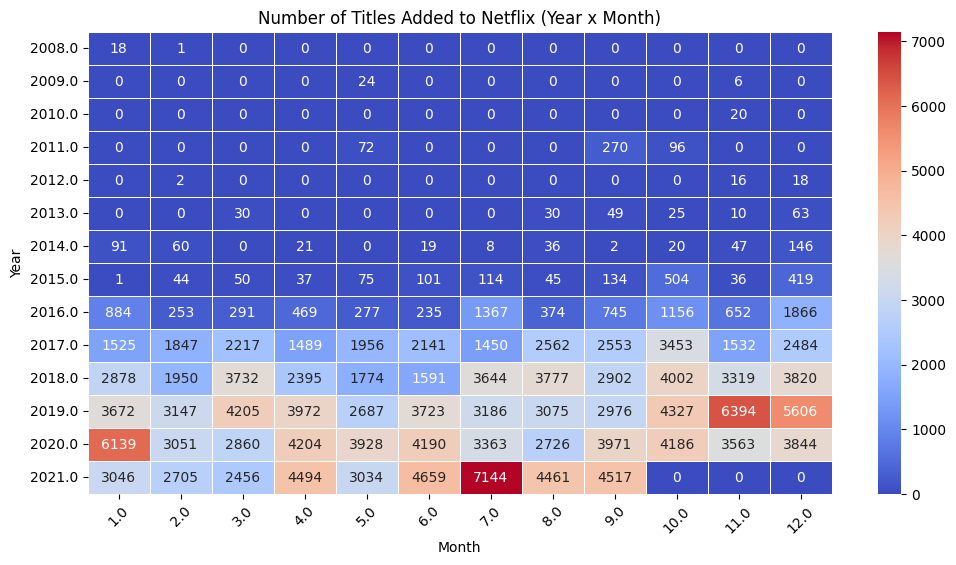

In [326]:
#Heatmap analysis

df_netflix_refined['date_added'] = pd.to_datetime(df_netflix_refined['date_added'])

# Extract the year and month, and create new columns
df_netflix_refined['year_added'] = df_netflix_refined['date_added'].dt.year
df_netflix_refined['month_added'] = df_netflix_refined['date_added'].dt.month

# Group the data by "year_added" and "month_added" and count the number of titles added
titles_added_by_year_month = df_netflix_refined.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(titles_added_by_year_month, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Number of Titles Added to Netflix (Year x Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()


Display the heatmap correlation where we can see the red region where month 7 so many movies or tv shows has been distributed among netflix

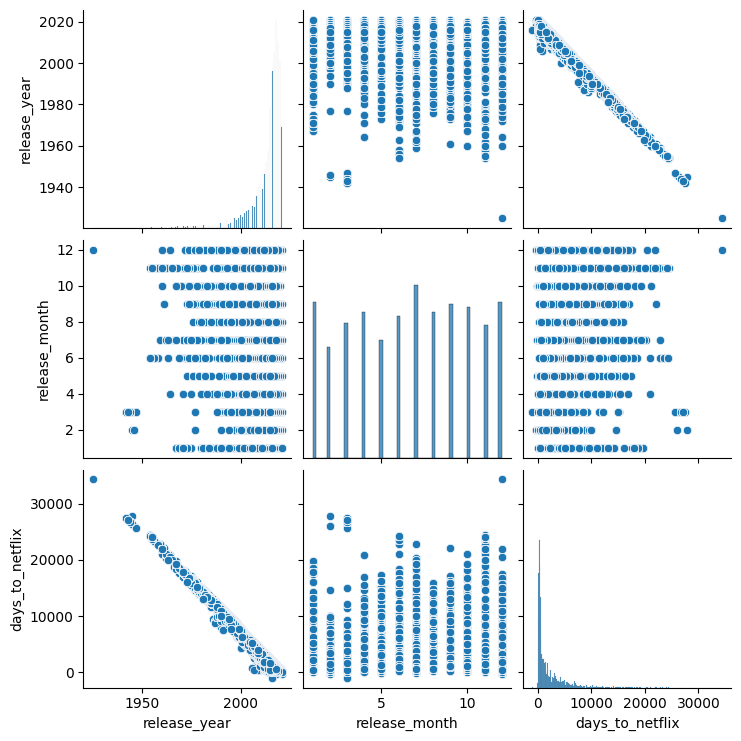

In [354]:
# Creating pairplots for checking insights for release_year ,month and days

import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame with numerical columns
numerical_columns = ['release_year', 'release_month', 'days_to_netflix']

# Create a pair plot
sns.pairplot(df_netflix_refined[numerical_columns])
plt.show()

BUSINESS INSIGHTS:

Content Quantity: Our analysis confirms that Netflix has a more extensive collection of movies compared to TV shows, indicating a dominance of cinematic content in their library.

Strategic Content Addition: Our findings highlight July as the month when Netflix tends to release a substantial amount of content, closely followed by December. This suggests a strategic approach to content release that aligns with seasonal and holiday trends.

Genre Connections: We identified strong positive correlations between various genres. For instance, TV dramas often overlap with international TV shows, while romantic themes are frequently found in international TV shows. These connections shed light on viewer preferences and content interrelations.

Movie Durations: Examining movie durations reveals a peak around the 1960s, followed by a stabilization at around 100 minutes. This reflects changing trends in movie lengths over time.

TV Show Seasons: Most TV shows on Netflix consist of only one season, indicating a preference for shorter series among viewers.

Common Themes: We noticed recurring themes in Netflix content titles and descriptions, with words like love, life, family, and adventure frequently appearing. These themes resonate with the broader audience.

Rating Trends: The distribution of ratings across different years provides insights into how audience reception has evolved over time, offering valuable information for content creators and viewers.

Data-Driven Insights: Our journey through data analysis showcases the power of data in unraveling Netflix's content landscape. These insights are invaluable for viewers and content creators alike.

Continuous Relevance: As the streaming industry evolves, understanding these patterns and trends becomes increasingly crucial for navigating Netflix's dynamic content landscape.

Enjoy Streaming: We hope this article has been both enlightening and enjoyable, offering you a fascinating glimpse into Netflix's ever-evolving content offerings. Let the data guide your streaming adventures, and stay tuned for more captivating stories on your favorite platform.






RECOMMENDATIONS:

Diversify Content: Netflix should expand its focus on TV shows since there is a significant audience interested in this format. Recognizing that TV shows have a dedicated following, investing in a diverse range of series can attract a broader viewership.

Collaborate with Top Directors: Establishing collaborations with top directors is a strategic move to create more compelling movies and TV shows. These partnerships can enhance content quality and popularity.

Empower Emerging Directors: Identifying directors with a track record of high-quality work, even if they have produced fewer movies, can lead to innovative and impactful content. Netflix should consider supporting such directors, potentially uncovering hidden talent.

Genre Diversification: While international movies are popular, Netflix should prioritize diversifying its content across genres like horror, comedy, and others. Catering to a wide range of tastes ensures a more engaging content library.

Thrilling TV Shows: Focusing on thriller genres for TV shows can result in longer-running series with multiple seasons, engaging viewers over an extended period.

Increase Annual Releases: To attract subscribers, Netflix should aim to increase the number of movie releases annually. This demonstrates the platform's commitment to providing fresh and diverse content throughout the year.

Strategic Release Dates: Targeting festival holidays, year-end, and weekends for content releases can maximize viewership. These are periods when people are more likely to engage with streaming platforms.

Direct-to-OTT Releases: Consider releasing movies directly on the platform if they receive positive reviews. This strategy can capitalize on the buzz generated by well-received films.

Leverage Influential Actors: Collaborating with actors who have substantial fan followings can be advantageous. Netflix can capitalize on their popularity by producing TV shows or web series featuring these actors.

Targeted Advertising: Increase advertising efforts in regions with limited movie releases to attract local audiences. Creating native TV shows that resonate with the culture can boost subscriptions in these areas.